In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_original = train.copy()
test_original = test.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
#train['Age'].fillna(train['Age'].median(), inplace = True)

In [34]:
# replacing missing values with Unknown tag 'U'

train['Cabin'].fillna('U', inplace = True)

# mapping each value with the cabin first letter
train['Cabin'] = train['Cabin'].map(lambda x : x[0])

In [35]:
# Extract class for Ticket number


In [36]:
# Extract Class of People
train['Title'] = train['Name'].map(lambda x : x.strip(',')
train['Name']

SyntaxError: invalid syntax (<ipython-input-36-77c002814284>, line 3)

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C


### Univariate Analysis

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

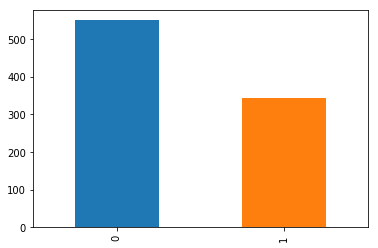

In [10]:
train['Survived'].value_counts().plot(kind = 'bar')

#### Visualizing Categorical variable

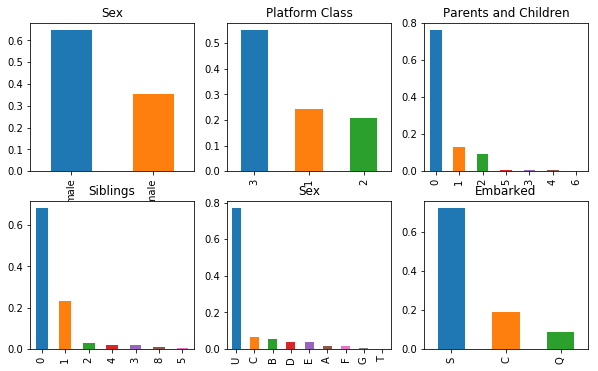

In [11]:
plt.figure(1)

plt.subplot(231)
train['Sex'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Sex')

plt.subplot(232)
train['Pclass'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Platform Class')

plt.subplot(233)
train['Parch'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Parents and Children')

plt.subplot(234)
train['SibSp'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Siblings')

plt.subplot(235)
train['Cabin'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Sex')

plt.subplot(236)
train['Embarked'].value_counts(normalize = True).plot(kind = 'bar', figsize = (10,6), title = 'Embarked')

plt.show()

#### Visualizing Numerical values

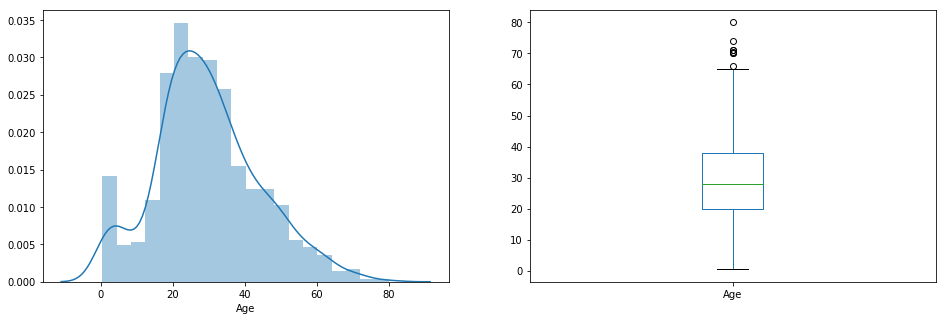

In [12]:
plt.figure(2)

plt.subplot(121)
train_notnull = train.dropna()
sns.distplot(train_notnull['Age'])

plt.subplot(122)
train_notnull['Age'].plot(kind = 'box', figsize = (16,5))

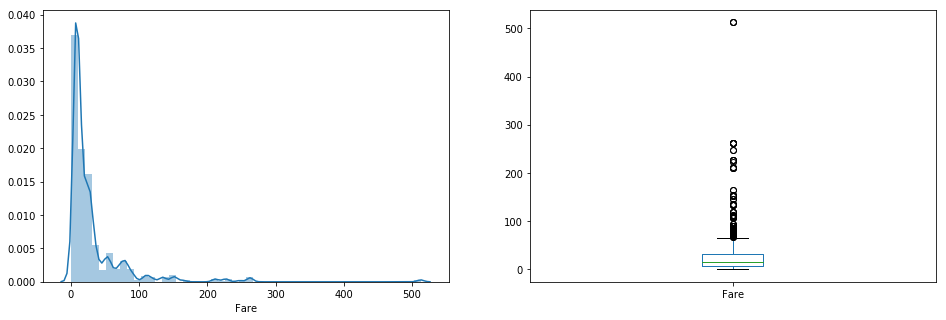

In [13]:
plt.figure(2)

plt.subplot(121)
sns.distplot(train['Fare'])

plt.subplot(122)
train['Fare'].plot(kind = 'box', figsize = (16,5))

### Bivariate Analysis

#### Categorical Independent Variable vs Target Variable

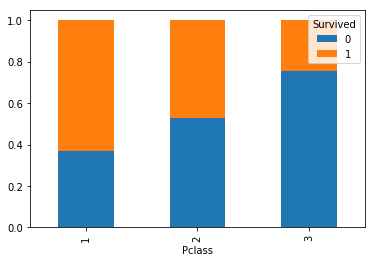

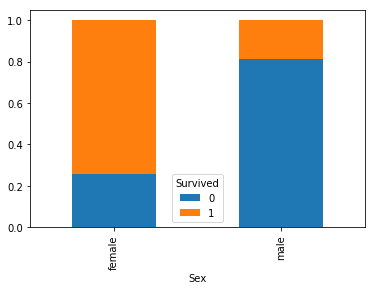

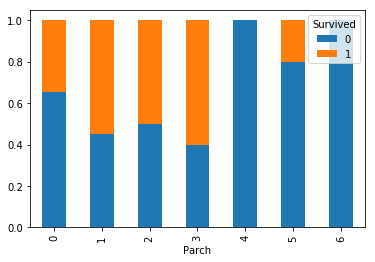

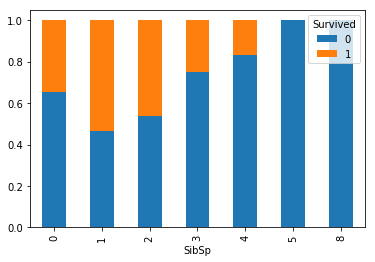

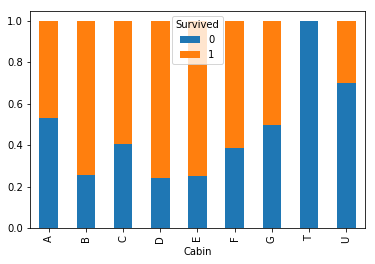

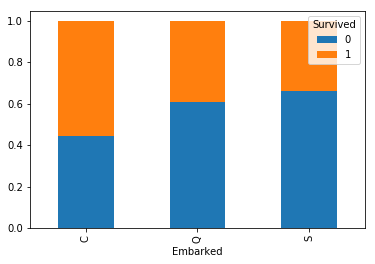

In [14]:
plt.figure(4)

pclass = pd.crosstab(train['Pclass'], train['Survived'])
pclass.div(pclass.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

sex = pd.crosstab(train['Sex'], train['Survived'])
sex.div(sex.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

parch = pd.crosstab(train['Parch'], train['Survived'])
parch.div(parch.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

sibsp = pd.crosstab(train['SibSp'], train['Survived'])
sibsp.div(sibsp.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

cabin = pd.crosstab(train['Cabin'], train['Survived'])
cabin.div(cabin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

embarked = pd.crosstab(train['Embarked'], train['Survived'])
embarked.div(embarked.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

#### Numerical Independent Variable vs Target Variable

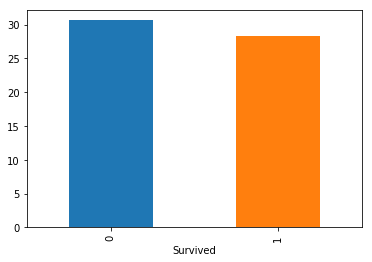

In [15]:
train.groupby('Survived')['Age'].mean().plot(kind = 'bar')

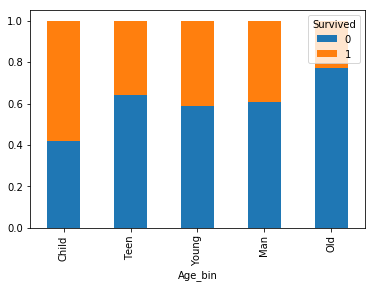

In [16]:
# Age bins

bins = [0, 12, 22, 40, 60, 80]
age_labels = ['Child', 'Teen', 'Young', 'Man', 'Old']
train['Age_bin'] = pd.cut(train['Age'], bins, labels = age_labels)

age_bin = pd.crosstab(train['Age_bin'], train['Survived'])
age_bin.div(age_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

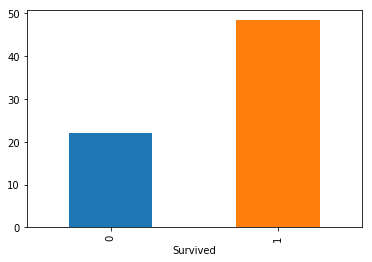

In [17]:
train.groupby('Survived')['Fare'].mean().plot(kind = 'bar')

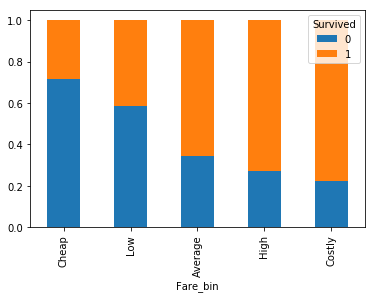

In [18]:
# Fare bins

bins = [0, 20, 50, 100, 250, 550]
fare_labels = ['Cheap', 'Low', 'Average', 'High', 'Costly']
train['Fare_bin'] = pd.cut(train['Fare'], bins, labels = fare_labels)

fare_bin = pd.crosstab(train['Fare_bin'], train['Survived'])
fare_bin.div(fare_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

### Correlation among the variables

In [19]:
train_corr = train.loc[:, ['Pclass', 'Age', 'Sibsp', 'Parch', 'Fare']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


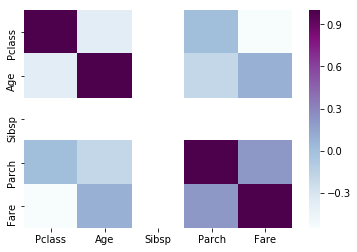

In [20]:
matrix = train_corr.corr()
f, ax = plt.subplots()
sns.heatmap(matrix, square = False, cmap = 'BuPu')

#### Outlier Treatment

Due to these outliers bulk of the data in the Fare is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: range parameter must be finite.

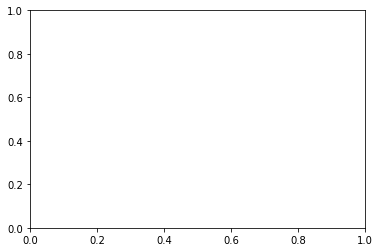

In [21]:
train['Fare_log'] = np.log(train['Fare'])
train['Fare_log'].hist(bins='auto')
#test['Fare_log'] = np.log(test['LoanAmount'])